In [197]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [216]:
batch_size = 256
learning_rate = 0.001
num_epoch = 40

In [199]:
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

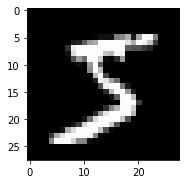

In [200]:
print(mnist_train[0][0].view(28,-1))
plt.subplot(1,2,1)
plt.imshow(torch.squeeze(mnist_train[0][0].view(28,-1)),cmap='gray')

In [201]:
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

In [202]:
z = []

In [203]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder1 = (nn.Linear(28*28,128))
        self.encoder2 = (nn.Linear(128,64))
        self.encoder3 = (nn.Linear(64,32))
        self.encoder4 = (nn.Linear(32,16))
        self.encoder5 = (nn.Linear(16,8))
        self.encoder6 = (nn.Linear(8,2))
        
        self.decoder = (nn.Linear(2,8))   
        self.decoder1 = (nn.Linear(8,16))   
        self.decoder2 = (nn.Linear(16,32))   
        self.decoder3 = (nn.Linear(32,64))
        self.decoder4 = (nn.Linear(64,128))
        self.decoder5 = (nn.Linear(128,28*28))
                
    def forward(self,x):
        x = x.view(batch_size,-1)
        x = F.relu(self.encoder1(x))
        x = F.relu(self.encoder2(x))
        x = F.relu(self.encoder3(x))
        x = F.relu(self.encoder4(x))
        x = F.relu(self.encoder5(x))
        x = F.tanh(self.encoder6(x))
        
        v = x
        
        x = F.relu(self.decoder(x))
        x = F.relu(self.decoder1(x))
        x = F.relu(self.decoder2(x))
        x = F.relu(self.decoder3(x))
        x = F.relu(self.decoder4(x))
        x = F.relu(self.decoder5(x))
        
        out = x.view(batch_size,1,28,28)
        return out, v

In [204]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = Autoencoder().to(device)
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

cpu


In [215]:
for i in range(num_epoch):
    overall_loss = 0
    for j,[image,label] in enumerate(train_loader):
        x = image.to(device)
        
        optimizer.zero_grad()
        output, v = model.forward(x)
        loss = loss_func(output,x)
        loss.backward()
        optimizer.step()
        overall_loss = overall_loss + loss.item()
    print("epoch : ", i)
    print("overall_loss : ", overall_loss)

epoch :  0
overall_loss :  9.735506024211645
epoch :  1
overall_loss :  9.816969610750675
epoch :  2
overall_loss :  9.64666311815381
epoch :  3
overall_loss :  9.608199063688517
epoch :  4
overall_loss :  9.58495693281293
epoch :  5
overall_loss :  9.572599448263645
epoch :  6
overall_loss :  9.515751138329506
epoch :  7
overall_loss :  9.493668410927057
epoch :  8
overall_loss :  9.459527771919966
epoch :  9
overall_loss :  9.475649274885654
epoch :  10
overall_loss :  9.459222700446844
epoch :  11
overall_loss :  9.452852196991444
epoch :  12
overall_loss :  9.442434806376696
epoch :  13
overall_loss :  9.411235604435205
epoch :  14
overall_loss :  9.403185915201902
epoch :  15
overall_loss :  9.407650042325258
epoch :  16
overall_loss :  9.441252194344997
epoch :  17
overall_loss :  9.402102567255497
epoch :  18
overall_loss :  9.418607901781797
epoch :  19
overall_loss :  9.393032137304544
epoch :  20
overall_loss :  9.348145712167025
epoch :  21
overall_loss :  9.411854900419712


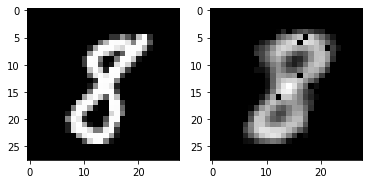

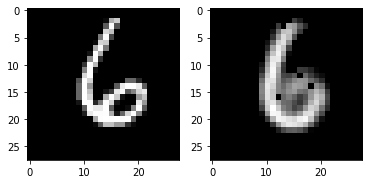

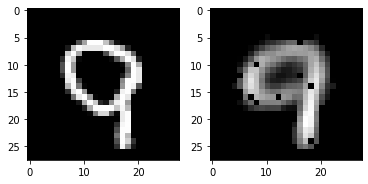

In [217]:
# auto encoder는 input으로만 평가할 수 있으므로
out_img = torch.squeeze(output.cpu().data)
#print(out_img.size())
#print(torch.squeeze(image[0]).numpy())
for i in range(3):
    plt.subplot(1,2,1)
    plt.imshow(torch.squeeze(image[i]).numpy(),cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()

In [218]:
lab = []
feat = []
with torch.no_grad():
  for i in range(1):
      for j,[image,label] in enumerate(test_loader):
          x = image.to(device)

          optimizer.zero_grad()
          output,z = model.forward(x)
          #label = label.reshape(256,-1)
          #z = torch.cat([z,label],dim=1)
          for i in range(len(z)):
                feat.append(list(z[i]))
                lab.append(int(label[i]))
      if j % 1000 == 0:
          print(loss)
print(len(z))
print(z)
print(len(feat))
print(len(lab))
print(len(test_loader))

256
tensor([[-0.3011, -0.7903],
        [-0.8845, -0.2910],
        [-0.9278, -0.5405],
        [-0.1644, -0.7443],
        [ 0.0799, -0.7836],
        [-0.2227, -0.7740],
        [-0.1319, -0.6377],
        [ 0.0102, -0.5984],
        [-0.9230, -0.5685],
        [ 0.1946, -0.6650],
        [-0.1449, -0.7328],
        [-0.7560, -0.2216],
        [-0.2016, -0.7302],
        [-0.1762, -0.7342],
        [-0.4498, -0.1610],
        [-0.0927, -0.7048],
        [ 0.1243, -0.7262],
        [-0.0161, -0.6669],
        [-0.1443, -0.7097],
        [-0.8366, -0.1622],
        [ 0.0814, -0.7975],
        [-0.9283, -0.3767],
        [-0.3325, -0.2062],
        [-0.6545,  0.0527],
        [-0.7071,  0.0965],
        [-0.8292,  0.2363],
        [-0.8706, -0.1964],
        [-0.1938, -0.8063],
        [-0.8947, -0.6918],
        [-0.1442, -0.6919],
        [-0.4569, -0.1244],
        [ 0.0730, -0.7525],
        [ 0.1981, -0.6482],
        [-0.7618,  0.1394],
        [-0.4602, -0.1778],
        [-0.7823

torch.Size([256, 28, 28])


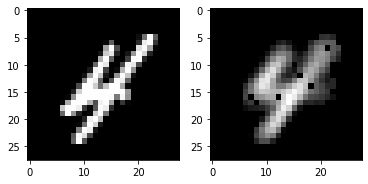

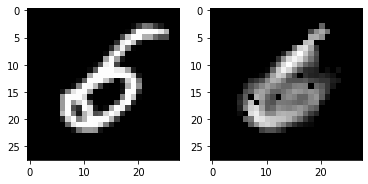

In [219]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(2):
    plt.subplot(1,2,1)
    plt.imshow(torch.squeeze(image[i]).numpy(),cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()

In [225]:
from sklearn.cluster import DBSCAN

##########데이터 로드
feat2 = []
lab2 = []
for i in range(len(feat)):
    if lab[i] == 0 or lab[i] == 1 or lab[i] == 2:
        lab2.append(lab[i])
        feat2.append(feat[i])
print(len(lab2))
print(len(lab))

eps = 0.05
min_samples = 5
model2 = DBSCAN(eps=eps, min_samples=min_samples)
y_predict = model2.fit(feat2)

noise_count = 0
ok = 0
ko = 0
for i in range(len(y_predict.labels_)):
    if y_predict.labels_[i] != -1 :
        print(y_predict.labels_[i] + 1,lab2[i])
        if y_predict.labels_[i] + 1 == lab2[i]:
            ok = ok + 1
        else:
            ko = ko + 1
    else:
        noise_count = noise_count + 1
        
print("#eps, min_samples : ", eps,min_samples)
print("#cluster count, noise count : ", max(y_predict.labels_)+1, noise_count)
print("#",((noise_count + ko) / (ok+ko+noise_count)) * 100)

#eps, min_samples :  0.05 5
#cluster count, noise count :  4 80
95.51241247612985


3142
9984
1 2
2 1
3 0
2 1
3 0
3 0
2 1
3 0
3 0
2 1
2 1
1 2
2 1
1 2
2 1
2 1
1 2
2 1
1 2
3 0
2 1
3 0
3 0
1 2
2 1
1 2
1 2
2 1
2 1
2 1
3 0
1 2
2 1
1 2
3 0
2 1
3 0
2 1
2 1
2 1
1 2
3 0
2 1
3 0
2 1
1 2
1 2
2 1
2 1
2 1
3 0
1 2
3 0
2 1
2 1
2 1
3 0
3 0
2 1
1 2
2 1
2 1
2 1
1 2
3 0
1 2
1 2
2 1
2 2
2 1
1 2
1 2
2 1
1 2
1 2
2 1
1 2
1 2
2 1
2 1
3 0
3 0
2 1
2 1
1 2
2 1
1 2
1 2
2 1
1 2
1 2
3 0
3 0
3 0
1 2
2 1
1 2
3 0
1 2
3 0
3 0
2 1
3 2
2 2
3 0
3 0
2 1
2 1
2 2
2 1
2 1
2 1
3 0
2 1
2 1
2 1
2 1
2 2
1 2
3 0
1 2
3 0
2 1
2 1
3 0
2 1
1 2
2 1
1 2
2 1
1 2
1 2
2 2
3 0
2 1
2 1
1 2
2 1
1 2
1 2
3 0
2 1
2 1
3 0
3 0
3 0
2 2
1 2
2 1
2 2
3 0
1 2
2 1
2 1
1 2
2 1
3 0
2 1
3 0
1 2
4 0
1 2
2 1
2 1
1 2
1 2
1 2
2 1
3 0
2 1
2 2
2 1
1 2
3 0
3 0
2 2
1 2
3 0
3 0
3 0
3 0
3 0
2 2
2 1
3 0
3 0
3 0
3 0
2 2
3 0
1 2
2 2
2 1
2 1
3 0
2 2
1 2
1 2
1 2
2 1
3 0
1 2
3 0
2 1
2 1
1 2
3 0
2 2
2 1
2 1
2 1
2 1
2 2
2 1
2 1
2 1
3 0
3 0
3 0
2 2
2 1
3 0
3 0
2 1
2 2
1 2
2 1
2 2
2 2
3 0
1 2
2 1
2 1
3 0
2 1
2 1
3 0
1 2
2 1
2 1
2 1
1 2
2 1
2 1
2 1
3 0
1 2
2 

2 1
1 2
1 2
3 0
3 0
2 1
3 0
2 1
1 2
1 2
1 2
2 1
1 2
3 0
1 2
3 0
3 0
2 1
3 0
3 0
1 2
2 1
2 1
1 2
2 1
1 2
3 0
2 1
1 2
2 1
1 2
2 1
2 1
3 0
2 1
3 0
2 1
3 0
3 0
2 1
2 2
2 1
3 0
2 1
1 2
4 2
2 1
2 2
2 2
3 0
1 2
1 2
1 2
3 0
3 0
2 1
1 2
3 0
2 1
1 2
3 0
2 1
1 2
3 0
3 0
2 2
3 0
2 1
2 1
2 1
1 2
3 0
2 1
1 2
1 2
1 2
2 1
2 1
2 2
2 1
3 0
3 0
2 1
3 0
1 2
3 0
2 1
1 2
3 0
2 1
1 2
3 0
2 1
1 2
1 2
2 1
2 1
3 0
3 0
2 1
2 1
2 1
3 0
1 2
1 2
1 2
2 1
1 2
3 0
3 0
3 0
3 0
3 0
3 0
2 1
1 2
1 2
2 1
2 1
3 0
1 2
2 1
3 0
2 1
1 2
3 0
2 1
1 2
3 0
2 1
1 2
1 2
1 2
1 2
3 0
1 2
3 0
2 1
2 1
1 2
1 2
2 1
3 0
1 2
2 1
2 1
3 0
2 1
2 1
1 2
3 0
3 0
2 1
3 0
2 1
3 0
3 0
2 1
1 2
3 0
2 1
1 2
3 0
2 1
1 2
3 0
3 0
2 1
3 0
1 2
2 1
3 0
1 2
3 0
3 0
2 1
1 2
2 1
3 0
2 1
2 1
3 0
1 2
2 1
3 0
2 1
1 2
2 1
1 2
2 1
1 2
3 0
2 1
1 2
3 0
2 1
3 0
2 1
1 2
3 0
2 1
2 1
1 2
2 1
1 2
3 0
3 0
2 1
1 2
1 2
2 1
2 1
3 0
3 0
1 2
2 1
3 0
2 1
3 0
1 2
3 0
1 2
1 2
2 1
1 2
2 1
3 0
3 0
3 0
2 1
1 2
3 0
2 1
1 2
3 0
2 1
1 2
3 0
2 1
2 1
2 1
1 2
2 2
3 0
2 1
2 1
1 2
1 2
3 0
1 2


95.51241247612985

3142 3142


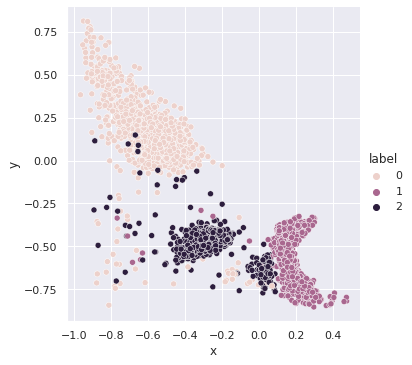

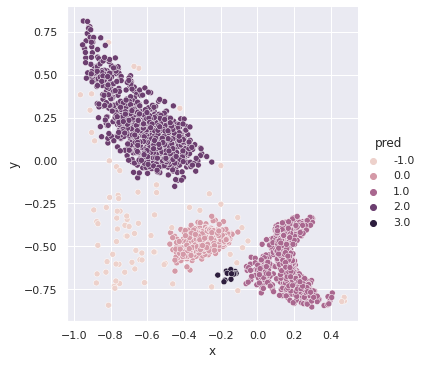

In [247]:
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
print(len(feat2),len(y_predict.labels_))
x = []
y = []
pred = []
for i in range(len(feat2)):
    x.append(float(feat2[i][0]))
    y.append(float(feat2[i][1]))
    pred.append(float(y_predict.labels_[i]))
# DataFrame 만들기

body = pd.DataFrame(
    {'x': x, 'y': y, 'pred' : pred, 'label' : lab2}
)
#print(body.body())
import matplotlib.pylab as plt

sns.relplot(x='x',y='y', hue="label", data=body)
sns.relplot(x='x',y='y', hue="pred", data=body)

# plt.legend(loc = "best")
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()